In [3]:
!pip install -Uqq timm

In [28]:
import timm 
import torch
from fastai.vision.all import *

model = timm.create_model('resnet34')
x     = torch.randn(1, 3, 224, 224)
model(x).shape

torch.Size([1, 1000])

In [7]:
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [12]:
conv1 = model.get_submodule('conv1')
conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [14]:
list(conv1.parameters())

[Parameter containing:
 tensor([[[[ 1.2430e-02,  1.7657e-02, -7.2429e-02,  ...,  5.6098e-03,
            -2.1290e-03, -1.5327e-03],
           [-1.1186e-02,  4.3894e-02, -2.1617e-02,  ...,  1.5096e-02,
            -2.5981e-02,  3.3285e-02],
           [-6.8283e-03,  1.2803e-02,  1.4974e-02,  ..., -2.2933e-03,
             2.8883e-02, -1.6485e-02],
           ...,
           [ 4.1167e-02, -3.3426e-02, -7.6749e-03,  ..., -1.0166e-02,
            -3.6307e-02,  2.2967e-02],
           [-1.3586e-03,  3.0347e-03,  3.5767e-02,  ...,  1.2666e-02,
             2.9329e-02,  4.8955e-02],
           [-4.6780e-03, -2.9873e-02,  2.6702e-03,  ...,  2.3127e-03,
            -3.7845e-02, -7.5021e-03]],
 
          [[ 3.0200e-03,  1.0047e-02, -2.6537e-02,  ..., -5.6610e-02,
             1.3024e-02, -1.2100e-02],
           [ 1.6230e-02,  1.9113e-02, -8.2085e-03,  ...,  3.4538e-02,
            -3.4784e-02,  5.6656e-03],
           [ 4.4661e-02, -3.9307e-02,  7.1340e-02,  ...,  3.5968e-02,
            -1.3

In [15]:
all_models = timm.list_models()
all_models[:5]

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384']

In [19]:
pretrained_models = timm.list_models(pretrained=True)
pretrained_models[-5:]

['xcit_tiny_24_p8_224_dist',
 'xcit_tiny_24_p8_384_dist',
 'xcit_tiny_24_p16_224',
 'xcit_tiny_24_p16_224_dist',
 'xcit_tiny_24_p16_384_dist']

In [20]:
# Turn any model into a feature extractor

# input batch with batch size of 1 and 3-channel image of size 224x224
x = torch.randn(1,3,224,224)
model = timm.create_model('resnet34')
model(x).shape

torch.Size([1, 1000])

In [21]:
feature_extractor = timm.create_model('resnet34', features_only=True, out_indices=[2,3,4])
out = feature_extractor(x)
out

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0954],
           [0.5508, 0.7299, 3.1665,  ..., 0.0000, 1.6749, 0.0000],
           [0.2676, 0.0000, 0.0000,  ..., 0.4270, 1.3055, 0.2419],
           ...,
           [0.0000, 1.0997, 0.1201,  ..., 0.8509, 0.0000, 0.5448],
           [0.7782, 0.2452, 0.8476,  ..., 0.0000, 1.0548, 1.7966],
           [0.0000, 0.9579, 0.0000,  ..., 0.4105, 0.7323, 0.4916]],
 
          [[1.0984, 0.1037, 0.0000,  ..., 0.0144, 0.0000, 0.4409],
           [0.0000, 0.4206, 0.0000,  ..., 0.0000, 0.0000, 1.0180],
           [2.2628, 0.0000, 0.4194,  ..., 1.6305, 1.0020, 0.2472],
           ...,
           [0.9514, 0.6684, 0.0000,  ..., 0.0000, 0.5384, 0.0000],
           [1.3135, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 2.3290],
           [0.0000, 1.4648, 0.0000,  ..., 0.0000, 0.3318, 0.0000]],
 
          [[0.7033, 0.1069, 0.4418,  ..., 0.0000, 0.0000, 0.1294],
           [0.6642, 0.0000, 0.0000,  ..., 0.0000, 2.7207, 0.0000],
           [0.1340, 0.00

In [22]:
[x.shape for x in out]

[torch.Size([1, 128, 28, 28]),
 torch.Size([1, 256, 14, 14]),
 torch.Size([1, 512, 7, 7])]

In [24]:
import torch.nn as nn
# input batch
x = torch.randn(1, 3, 224, 224)

pool  = nn.MaxPool2d(3, 2, 1, 1)
conv1 = nn.Conv2d(3, 64, 7, stride=2, padding=3)
conv2 = nn.Conv2d(64, 64, 3, 1, 1)
conv3 = nn.Conv2d(64, 128, 3, 2, 1)

# feature map from Layer-0
conv1(x).shape
# feature map from Layer-1
conv2(pool(conv1(x))).shape

torch.Size([1, 64, 56, 56])

In [25]:

convnext_models = timm.list_models('convnext*')
convnext_models[:5]

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k']

In [32]:
path = untar_data(URLs.PETS)
def label_func(f): return f[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), label_func, item_tfms=Resize(224))


In [33]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /Users/ajithj/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth
/Users/ajithj/mambaforge/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/Users/ajithj/mambaforge/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,error_rate,time
0,0.326625,0.209810,0.098782,31:56


epoch,train_loss,valid_loss,error_rate,time
0,0.260314,0.159371,0.067659,43:35
1,0.178006,0.133047,0.054465,44:41
2,0.145699,0.126709,0.052774,56:13


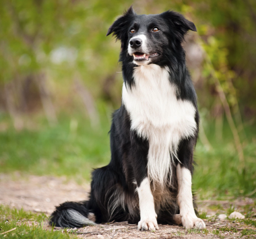

In [34]:

im = Image.open(')
im.to_thumb(256,256)

In [35]:
learn.export('convnext_tiny_in22k.pkl')

In [39]:
is_cat, idx, probs = learn.predict(PILImage.create('./data/dog.png'))
is_cat, idx, probs

/Users/ajithj/mambaforge/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/Users/ajithj/mambaforge/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('False', TensorBase(0), TensorBase([0.9988, 0.0012]))